# Solar System Model

## Luke Layman

### Importing packages

In [2]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
%matplotlib inline

### Setting up varibles

In [5]:
DeltaT = 0.01
#set up arrays 
tfinal = 100
n = ceil(tfinal/DeltaT)

#Masses
M_sun = 2 * 10**30 #kg
M_ear = 6 * 10**24 #kg
M_jup = 1.9 * 10**27 #kg
M_mar = 6.6 * 10**23 #kg
M_ven = 4.9 * 10**24 #kg
M_sat = 5.5 * 10**26 #kg
M_mer = 3.3 * 10**23 #kg
M_ura = 8.8 * 10**25 #kg
M_nep = 1.03 * 10**26 #kg
M_plu = 1.31 * 10**22 #kg

# 4pi^2 constant
Fourpi2 = 4*pi*pi

# set up array for t
t = np.zeros(n)

# intial conditions for each planet
#earth
v_ear = np.zeros((n,2))
r_ear = np.zeros((n,2))
#conditions
r0_ear = np.array([1.0,0.0])
v0_ear = np.array([0.0,2*pi])
r_ear[0] = r0_ear
v_ear[0] = v0_ear

#jupiter
v_jup = np.zeros((n,2))
r_jup = np.zeros((n,2))
#conditions
r0_jup = np.array([1.23,-5.04])
v0_jup = np.array([(7.24*10**-3)*365,(2.14*10**-3)*365])
r_jup[0] = r0_jup
v_jup[0] = v0_jup

#mars
v_mar = np.zeros((n,2))
r_mar = np.zeros((n,2))
#conditions
r0_mar = np.array([-1.69*10**-1,-1.45])
v0_mar = np.array([(1.44*10**-2)*365,(-2.37*10**-4)*365])
r_mar[0] = r0_mar
v_mar[0] = v0_mar

#venus
v_ven = np.zeros((n,2))
r_ven = np.zeros((n,2))
#conditions
r0_ven = np.array([-6.74*10**-1,2.66*10**-1])
v0_ven = np.array([(-7.39*10**-3)*365,(-1.89*10**-2)*365])
r_ven[0] = r0_ven
v_ven[0] = v0_ven

#saturn
v_sat = np.zeros((n,2))
r_sat = np.zeros((n,2))
#conditions
r0_sat = np.array([4.25,-9.07])
v0_sat = np.array([(4.74*10**-3)*365,(2.35*10**-3)*365])
r_sat[0] = r0_sat
v_sat[0] = v0_sat

#mercury
v_mer = np.zeros((n,2))
r_mer = np.zeros((n,2))
#conditions
r0_mer = np.array([1.32*10**-1,-4.19*10**-1])
v0_mer = np.array([(2.11*10**-2)*365,(1.00*10**-2)*365])
r_mer[0] = r0_mer
v_mer[0] = v0_mer

#uranus
v_ura = np.zeros((n,2))
r_ura = np.zeros((n,2))
#conditions
r0_ura = np.array([1.599*10**1,1.17*10**1])
v0_ura = np.array([(-2.35*10**-3)*365,(2.99*10**-3)*365])
r_ura[0] = r0_ura
v_ura[0] = v0_ura

#neptune
v_nep = np.zeros((n,2))
r_nep = np.zeros((n,2))
#conditions
r0_nep = np.array([2.93*10**1,-6.06])
v0_nep = np.array([(6.15*10**-4)*365,(3.09*10**-3)*365])
r_nep[0] = r0_nep
v_nep[0] = v0_nep

#pluto
v_plu = np.zeros((n,2))
r_plu = np.zeros((n,2))
#conditions
r0_plu = np.array([1.33*10**1,-3.13*10**1])
v0_plu = np.array([(2.96*10**-3)*365,(5.602*10**-4)*365])
r_plu[0] = r0_plu
v_plu[0] = v0_plu


#planet lists to looping:
mass_list = [M_ear, M_mer, M_mar, M_ven, M_sat, M_jup, M_ura, M_nep, M_plu]
pos_list = [r_ear, r_mer, r_mar, r_ven, r_sat, r_jup, r_ura, r_nep, r_plu]
vel_list = [v_ear, v_mer, v_mar, v_ven, v_sat, v_jup, v_ura, v_nep, v_plu]

### Function solving for position

In [6]:
for p in range(9):
    
    #pick one planet to do all calculations for
    one_mass = mass_list[p]
    one_r = pos_list[p]
    one_v = vel_list[p]
    
    #resetting time to 0
    t = np.zeros(n)
    
    #looping through all planets
    for l in range(9):
        if p != l:
            two_mass = mass_list[l]
            two_r = pos_list[l]
            two_v = vel_list[l]
    
    # Start integrating using the Velocity-Verlet  method
            for i in range(n-1):
    
            #finding compenents for acceleration
                rabs_one = sqrt(sum(one_r[i]*one_r[i]))
                rabs = sqrt( (one_r[i][0] - two_r[i][0])**2 + (one_r[i][1] - two_r[i][1])**2 )
    
            #acceleration
                a_one = (-Fourpi2*one_r[i]/(rabs_one**3)) - (Fourpi2*(two_mass/M_sun)/(rabs**3))*(one_r[i] - two_r[i])
    
            #position
                one_r[i+1] = one_r[i] + DeltaT*one_v[i]+0.5*(DeltaT**2)*a_one
    
            #updating compoenets for accerleration
                rabs_one = sqrt(sum(one_r[i+1]*one_r[i+1]))
                rabs = sqrt((one_r[i+1][0] - two_r[i+1][0])**2 + (one_r[i+1][1] - two_r[i+1][1])**2)
    
            #new accerlration
                anew_one = -4*(pi**2)*one_r[i+1]/(rabs_one**3) - (Fourpi2*(two_mass/M_sun)/(rabs**3))*(one_r[i+1] - two_r[i+1])
                
            #velocity
                one_v[i+1] = one_v[i] + 0.5*DeltaT*(a_one+anew_one)
    
            #time
                t[i+1] = t[i] + DeltaT

### Plotting Results

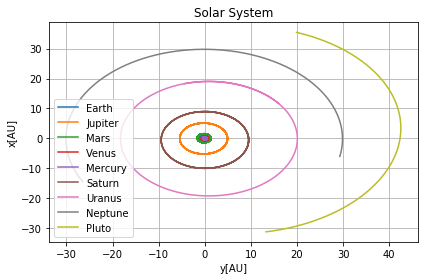

In [7]:
# Plot position as function of time    
fig, ax = plt.subplots()
ax.set_ylabel('x[AU]')
ax.set_xlabel('y[AU]')
ax.plot(r_ear[:,0], r_ear[:,1], label='Earth')
ax.plot(r_jup[:,0], r_jup[:,1], label='Jupiter')
ax.plot(r_mar[:,0], r_mar[:,1], label='Mars')
ax.plot(r_ven[:,0], r_ven[:,1], label='Venus')
ax.plot(r_mer[:,0], r_mer[:,1], label='Mercury')
ax.plot(r_sat[:,0], r_sat[:,1], label='Saturn')
ax.plot(r_ura[:,0], r_ura[:,1], label='Uranus')
ax.plot(r_nep[:,0], r_nep[:,1], label='Neptune')
ax.plot(r_plu[:,0], r_plu[:,1], label='Pluto')
plt.title('Solar System')
plt.legend()
plt.grid()
fig.tight_layout()
#ax.axis('equal')
plt.show()